In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import optimizers
import tensorflow as tf

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

### Ejercicio clase

In [3]:
# mae = 192

In [30]:
df = pd.read_csv(r"C:\Users\Dell7400\Documents\Ale\Facu\Aprendizaje_Supervisado\Data\Gitters.csv")
print(df.shape)
#df["target"]= np.where(df.NewLeague=="A",1,0)
df["target"]= df.Salary
df = df.drop(columns={"NewLeague"})
df.head()

(263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,target
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,475.0
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,480.0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,500.0
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,91.5
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,750.0


In [31]:
# le saco los object, podria pasarlo a dummie pero lo hago despues
df_numeric = df[df.columns[df.dtypes!="object"]]


In [32]:
columnas = df_numeric.columns

In [29]:
# scaleo las variables
#for x in range(len(columnas)):
#    df_numeric.iloc[:,x] = scaler.fit_transform(np.array(df_numeric.iloc[:,x]).reshape(-1,1))

In [33]:
df_numeric.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,target
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,475.0
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,480.0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,500.0
3,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,91.5
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,750.0


In [34]:
target_data = df_numeric["target"]
training_data = df_numeric.drop(columns={"Salary","target"})

In [53]:
model = Sequential()
model.add(Dense(2, input_dim=len(df_numeric.columns)-2, activation='relu',input_shape=(len(df_numeric.columns)-2,))) # ver aca el input_shape para que sirve 
model.add(keras.layers.Dropout(0.2))

#model.add(Dense(1, input_dim=len(df_numeric.columns)-1, activation='sigmoid',input_shape=(len(df_numeric.columns)-1,))) # ver aca el input_shape para que sirve 


In [12]:
#opt = keras.optimizers.optimizer_rmsprop(learning_rate=0.01)

opt = keras.optimizers.RMSprop(
    learning_rate=0.01,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop")

# en binario conviene poner crossentropy

model.compile(loss='mse',
              optimizer=opt,
              metrics=['mse'])#acc
#              early_stoping=10)

model.predict(training_data)
            

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03345903],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06585781, ..., 0.03385868, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0186067 ],
       [0.        , 0.        , 0.03283261, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [54]:
model.compile(loss="mse", optimizer="rmsprop", metrics=["mean_absolute_error"])


Epoch 1/500
8/8 [==============================] - 0s 19ms/step - loss: 2619438.2500 - mean_absolute_error: 953.6128 - val_loss: 1244777.5000 - val_mean_absolute_error: 759.6497
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 2493156.0000 - mean_absolute_error: 934.9252 - val_loss: 1173200.5000 - val_mean_absolute_error: 738.4179
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 2624658.0000 - mean_absolute_error: 972.9261 - val_loss: 1108897.2500 - val_mean_absolute_error: 722.3946
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 2060459.5000 - mean_absolute_error: 872.6440 - val_loss: 1057060.7500 - val_mean_absolute_error: 707.6427
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 2207781.5000 - mean_absolute_error: 893.3266 - val_loss: 1002814.4375 - val_mean_absolute_error: 694.0938
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 2153147.0000 - mean_absolute_error: 882.208

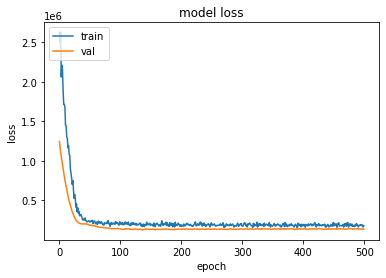

In [55]:
clf = model.fit(training_data, target_data,validation_split = 0.1, epochs=500)
plt.plot(clf.history['loss'])
plt.plot(clf.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

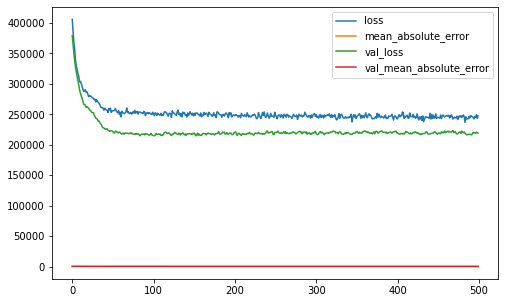

In [44]:
pd.DataFrame(clf.history).plot(figsize=(8,5))
plt.show()


In [39]:
len(model.predict(training_data)[20])

1

In [64]:
y_pred = model.predict(training_data)  # Esta es simplemente la capa de salida de la RN


In [69]:
y_predic = []
for x in range(len(y_pred)):
    a=np.max(y_pred[x])
    y_predic.append(a)

In [62]:
y_pred = np.argmax(y_pred, axis=1)  # Aquí predecimos según el valor de máxima activación


In [71]:
def accuracy(pred, truth):
    return np.mean(pred == truth)


In [74]:
accuracy(np.round(y_predic), np.round(target_data))

0.0

In [18]:
target_data.value_counts()

0.285266    8
0.013584    6
0.076280    6
0.009404    6
0.264368    5
           ..
0.176594    1
0.749827    1
0.220481    1
0.481714    1
0.373041    1
Name: target, Length: 150, dtype: int64